Model Performance
-----------------
MAE : 23.06
R2  : 0.83


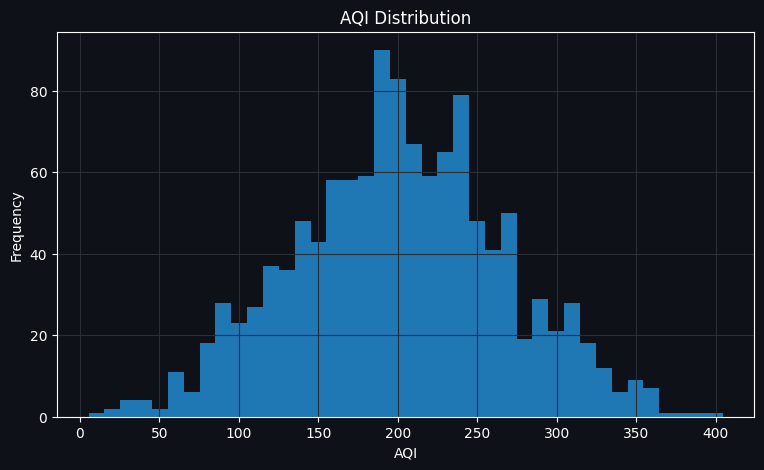

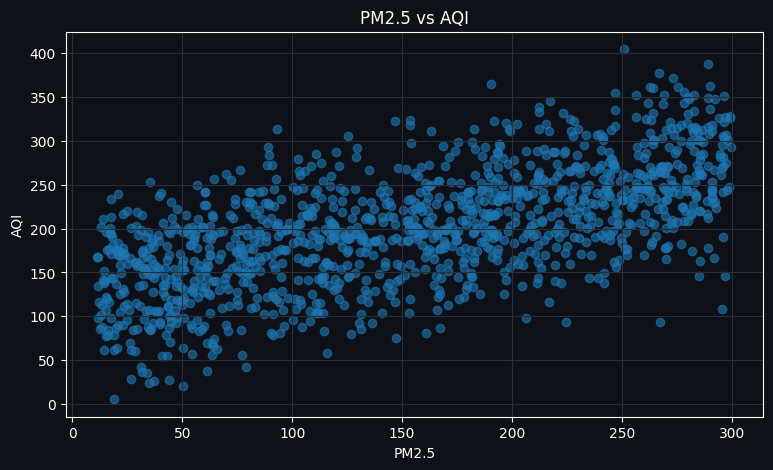

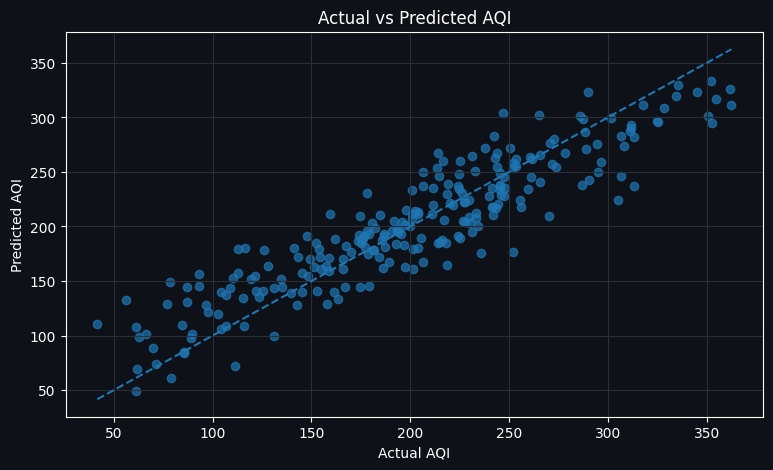

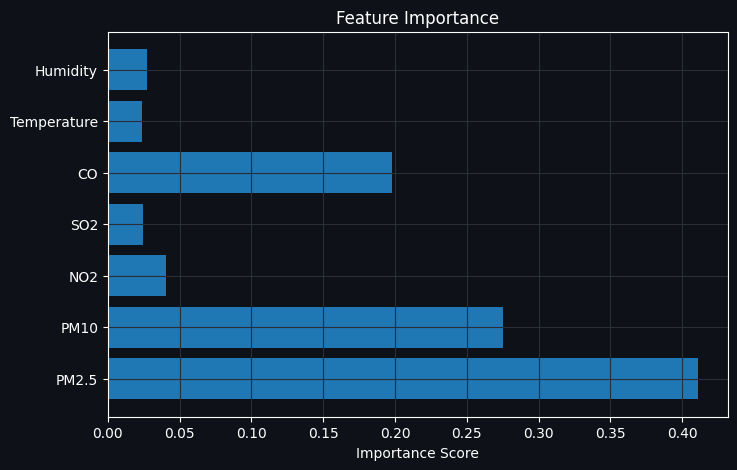

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df=pd.read_csv("air_quality_aqi_data.csv")

plt.rcParams.update({
    "figure.facecolor": "#0E1117",
    "axes.facecolor": "#0E1117",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "#2A2E35",
})

x=df.drop("AQI",axis=1)
y=df["AQI"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("Model Performance")
print("-----------------")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2  : {r2_score(y_test, y_pred):.2f}")

plt.figure(figsize=(9, 5))
plt.hist(df["AQI"], bins=40)
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(9, 5))
plt.scatter(df["PM2.5"], df["AQI"], alpha=0.6)
plt.title("PM2.5 vs AQI")
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

plt.figure(figsize=(9, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.title("Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.barh(x.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.grid(True)
plt.show()
